4.비선형SVM_다항 특성 확장

Contents
<div id="toc"></div>

# 1. 비선형 SVM

## 1.1. 선형 SVM 분류의 한계

- 모든 데이터들을 선형적으로 분류할 수 있는 것은 아니다.

In [11]:
import numpy as np

X = np.linspace(-4, 4, 9).reshape(-1, 1)  # -1 : 자동 계산
y = np.array([0,0,1,1,1,1,1,0,0])

<img src="img/ch4_1.png" width="50%">

## 1.2. 비선형 데이터의 특성 확장

- 비선형 데이터의 특성을 다항식 형태로 변환하면 선형적으로 구분이 가능하게 될 수 있다.

In [12]:
import numpy as np
import sklearn.preprocessing as pp

X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0,0,1,1,1,1,1,0,0])

poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [13]:
print(X_poly)

[[ 1. -4. 16.]
 [ 1. -3.  9.]
 [ 1. -2.  4.]
 [ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


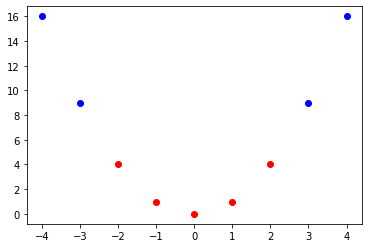

In [16]:
import matplotlib.pyplot as plt

c_set = ['b', 'r']

for i in range(len(y)):
    plt.scatter(X_poly[i,1],X_poly[i,2], c=c_set[y[i]])

### 1.2.1 실습 - 비선형 데이터의 특성 확장 후 선형 SVM 분류

- 다음과 같은 비선형 데이터에 대해서 선형 SVM을 수행한다.

In [17]:
import sklearn.datasets as d

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

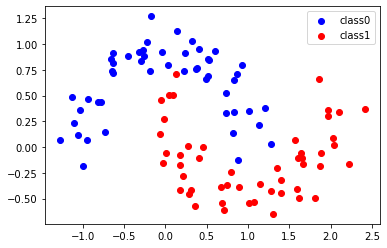

In [18]:
c_set = ['b', 'r']
l_set = ['class0', 'class1']

for t in set(y):
    X_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]

    plt.scatter(X_pts,y_pts, c=c_set[t], label=l_set[t])
    
plt.legend()
plt.show()

- 비선형 데이터를 그대로 이용하여 분류한 결과는 좋지 않다.

In [24]:
import sklearn.svm as svm

clf = svm.SVC(C=10, kernel='linear').fit(X,y)

In [25]:
clf.coef_, clf.intercept_

(array([[ 0.81145329, -2.6978306 ]]), array([0.20486262]))

- **clf.coef_, clf.intercept_** 를 활용하여 초평면 구하기
<img src="img/ch4_2.png" width="50%">

- 데이터의 특성을 다항식 형태로 변환한 뒤, 선형 SVM 분류를 수행한다.

In [26]:
import sklearn.preprocessing as pp

poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [27]:
import sklearn.svm as svm

clf = svm.SVC(C=10, kernel='linear').fit(X_poly,y)

In [28]:
clf.coef_, clf.intercept_

(array([[-5.77315973e-15, -1.75243810e+00, -2.09583732e+00,
         -5.49332897e+00, -3.82944358e-01, -8.89003669e-01,
          3.90561035e+00, -1.39116772e+00,  2.23027147e+00,
         -2.59231477e+00]]),
 array([2.58798556]))

- 다항식 형태로 변환된 데이터에 대해 선형 SVM 분류를 수행한 결과, 적절한 결정 경계가 나타난 것을 확인할 수 있다.
<img src="img/ch4_3.png" width="60%">

## 1.3. 결정 경계와 예측값의 관계

- 예측값은 **predict** 메소드를 호출하여 반환되는 결과이며, 이진 분류에서는 0 또는 1로 도출된다.


- 결정 경계에 대해 적용한 값은 **decision_function** 메소드를 호출하여 반환되는 결과이며, 그 값의 부호에 따라 예측값이 결정된다.
    - 결과 값이 양수이면 결정 경계의 위(양성 초평면 상)에 존재한다는 의미이다. 따라서 예측값은 1이다.
    - 결과 값이 음수이면 결정 경계의 아래(음성 초평면 상)에 존재한다는 의미이다. 따라서 예측값은 0이다.

- 어떤 데이터에 대한 **decision_function** 메소드의 반환 값은 <span class="mark">그 데이터가 어떤 초평면 상에 있는지 판단의 근거</span>가 된다.

In [29]:
X_new = np.array([[1, -0.5], [1, 0], [1, 0.5]])
X_new_poly = poly.fit_transform(X_new)

y_new_pred = clf.predict(X_new_poly)
print(y_new_pred)

[1 0 0]


In [31]:
X_new = np.array([[1, -0.5], [1, 0], [1, 0.5]])
X_new_poly = poly.fit_transform(X_new)

y_new_decision = clf.decision_function(X_new_poly)
print(np.round(y_new_decision, 3))

[ 1.842 -0.752 -2.676]


1 -> 1.8542  
0, 0 -> -0.752, -2.676

# 참고: 비선형 분류 결정 경계의 플롯 표현 예

## 비선형 SVM 분류 결정 경계의 플롯

- 가로축(X)과 세로축(Y)의 각 좌표들마다 높이축(Z) 값이 존재할 때, 이 데이터를 3차원 육면체가 아니라 2차원 평면 상에서 등고선으로 그리거나 등고선의 내부를 채워서 높이 축의 값을 표현할 수 있다.
    - **pyplot**의 **contour** 함수를 이용하여 등고선을 그린다.
    - **pyplot**의 **contourf** 함수를 이용하여 등고선의 내부를 채운다.
- 이 함수를 이용하여 결정 경계 곡선을 표시하겠다는 것이 핵심 발상이다

- 가로축(X)과 세로축(Y)의 각 좌표들마다 높이축(Z) 값이 존재할 때, 이 데이터를 3차원 육면체가 아니라 2차원 평면 상에서 등고선으로 그리거나 등고선의 내부를 채워서 높이축의 값을 표현할 수 있다.

```python
# plt.contour 함수
# 가로축 X, 세로축 Y, 높이축 Z 값들을 인자로 받아서
# 이 높이에 해당하는 Z값들을 기준으로 등고선을 표현한다.
plt.contour(X, Y, Z, ...)
```

```python
# plt.contour 함수
# 가로축 X, 세로축 Y, 높이축 Z 값들을 인자로 받아서
# 이 높이에 해당하는 Z값들을 기준으로 등고선의 내부를 채운다.
plt.contour(X, Y, Z, ...)
```

## 실습

In [36]:
import sklearn.datasets as d

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

In [37]:
import sklearn.preprocessing as pp
import sklearn.svm as svm

poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

clf = svm.SVC(kernel='linear', C=10).fit(X_ploy, y)

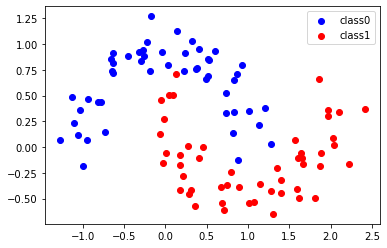

In [40]:
import matplotlib.pyplot as plt

c_set = ['b', 'r']
l_set = ['class0', 'class1']

for t in set(y):
    X_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]

    plt.scatter(X_pts,y_pts, c=c_set[t], label=l_set[t])
    
plt.legend()
plt.show()

In [39]:
import numpy as np

X1s = np.linspace(-1.5, 3.0, 100)
X2s = np.linspace(-1, 1.5, 100)

X1, X2 = np.meshgrid(X1s, X2s) # X1s, X2s으로 조합가능한 모든 좌표 생성 : len(X1s) X len(X2s) 짜리 배열 생성

In [60]:
################################################################
# meshgrid 예시

a = np.arange(3)
b = np.arange(3, 7)

A, B = np.meshgrid(a, b)

for x_pt, y_pt in zip(A, B):  # x_pt = [0 1 2], y_pt = [3 3 3]
    for x, y in zip(x_pt, y_pt):
        print('(',x, y,')', end='')
        
# A.ravel() # 1차원화
# B.ravel()

# np.vstack( ( A.ravel(), B.ravel() ) )
# np.vstack((A.ravel(), B.ravel())).transpose()  # 전치

################################################################

( 0 3 )( 1 3 )( 2 3 )( 0 4 )( 1 4 )( 2 4 )( 0 5 )( 1 5 )( 2 5 )( 0 6 )( 1 6 )( 2 6 )

Text(0, 0.5, '$X_{2}$')

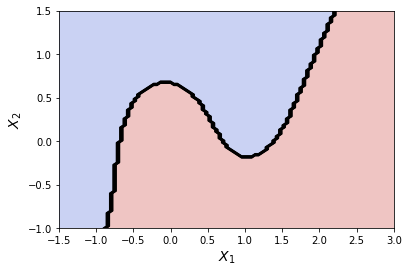

In [72]:
XX = np.vstack((X1.ravel(), X2.ravel())).transpose()
XX_poly = poly.fit_transform(XX)
y_pred = clf.predict(XX_poly)
y_pred_s = y_pred.reshape(X1.shape)

plt.contour(X1s, X2s, y_pred_s, colors='black')
plt.contourf(X1s, X2s, y_pred_s, cmap=plt.cm.coolwarm, alpha=0.3)

plt.xlabel('$X_{1}$', fontsize=14)
plt.ylabel('$X_{2}$', fontsize=14)

In [73]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>